In [1]:
import numpy as np

# Portefeuille A (Conservative)
rendements_A = np.array([
1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
]) / 100  # Convertir en décimal

# Portefeuille B (Agressif)
rendements_B = np.array([
4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
]) / 100  # Convertir en décimal


In [2]:
# Moyenne
mean_A = np.mean(rendements_A)
mean_B = np.mean(rendements_B)

# Écart-type
std_A = np.std(rendements_A, ddof=1)
std_B = np.std(rendements_B, ddof=1)

# Médiane
median_A = np.median(rendements_A)
median_B = np.median(rendements_B)

# Rendement annuel
R_annuel_A = (1 + mean_A)**12 - 1
R_annuel_B = (1 + mean_B)**12 - 1

# Volatilité annuelle
sigma_annuel_A = std_A * np.sqrt(12)
sigma_annuel_B = std_B * np.sqrt(12)

mean_A, std_A, median_A, R_annuel_A, sigma_annuel_A, mean_B, std_B, median_B, R_annuel_B, sigma_annuel_B


(np.float64(0.009375000000000001),
 np.float64(0.004771404861026372),
 np.float64(0.01),
 np.float64(0.11848593740999647),
 np.float64(0.016528631285557586),
 np.float64(0.02891666666666667),
 np.float64(0.04447365284189561),
 np.float64(0.047),
 np.float64(0.4078695799529177),
 np.float64(0.15406125264068637))

In [3]:
import numpy as np

# Données historiques (rendements mensuels en %)
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
]) / 100  # Convertir en décimal

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
]) / 100  # Convertir en décimal

def statistiques_portefeuille(rendements, nom_portefeuille):
    # Moyenne et écart-type mensuels
    moyenne_mensuelle = np.mean(rendements) * 100
    ecart_type_mensuel = np.std(rendements, ddof=1) * 100  # ddof=1 pour échantillon

    # Médiane
    mediane = np.median(rendements) * 100

    # Rendement annualisé (capitalisation)
    rendement_annuel = (np.prod(1 + rendements)**(12/len(rendements)) - 1) * 100

    # Volatilité annualisée
    volatilite_annuelle = np.std(rendements, ddof=1) * np.sqrt(12) * 100

    # Affichage
    print(f"PORTEFEUILLE {nom_portefeuille}")
    print(f"• Rendement mensuel moyen : {moyenne_mensuelle:.2f}%")
    print(f"• Écart-type mensuel : {ecart_type_mensuel:.2f}%")
    print(f"• Médiane : {mediane:.2f}%")
    print(f"• Rendement annualisé : {rendement_annuel:.2f}%")
    print(f"• Volatilité annualisée : {volatilite_annuelle:.2f}%\n")

# Calcul pour chaque portefeuille
statistiques_portefeuille(rendements_A, "A (Conservative)")
statistiques_portefeuille(rendements_B, "B (Agressif)")


PORTEFEUILLE A (Conservative)
• Rendement mensuel moyen : 0.94%
• Écart-type mensuel : 0.48%
• Médiane : 1.00%
• Rendement annualisé : 11.83%
• Volatilité annualisée : 1.65%

PORTEFEUILLE B (Agressif)
• Rendement mensuel moyen : 2.89%
• Écart-type mensuel : 4.45%
• Médiane : 4.70%
• Rendement annualisé : 39.26%
• Volatilité annualisée : 15.41%



/tmp/ipython-input-3775388618.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rendements_A*100, rendements_B*100], labels=['A', 'B'], patch_artist=True,


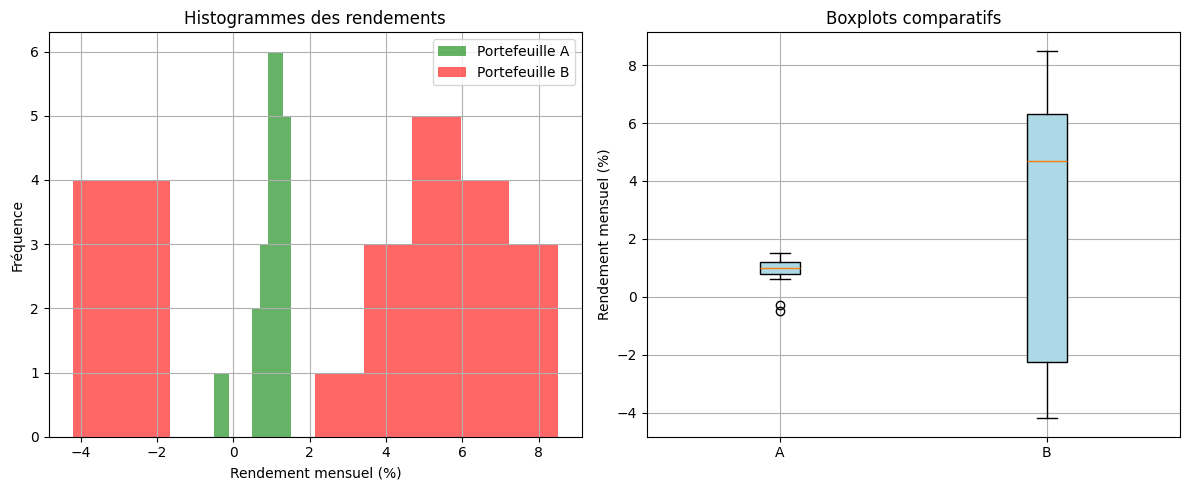

--- Portefeuille A (Conservative) ---
VaR 95% mensuelle : 0.15% (~751.09 €)
VaR 95% annuelle : 9.11% (~45534.60 €)
Test Shapiro-Wilk : p-value = 0.0003 (Normalité douteuse)

--- Portefeuille B (Agressif) ---
VaR 95% mensuelle : -4.45% (~-22232.43 €)
VaR 95% annuelle : 13.84% (~69191.77 €)
Test Shapiro-Wilk : p-value = 0.0012 (Normalité douteuse)

--- Ratio Sharpe ---
Portefeuille A : 5.34
Portefeuille B : 2.35

--- Recommandation Client ---
Aucun portefeuille ne respecte parfaitement les contraintes, privilégier celui avec Sharpe le plus élevé et VaR acceptable.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Données historiques
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
]) / 100

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
]) / 100

# --- Question 1.2 : Visualisation distributions ---
plt.figure(figsize=(12,5))

# Histogrammes superposés
plt.subplot(1,2,1)
plt.hist(rendements_A*100, bins=10, alpha=0.6, color='green', label='Portefeuille A')
plt.hist(rendements_B*100, bins=10, alpha=0.6, color='red', label='Portefeuille B')
plt.title("Histogrammes des rendements")
plt.xlabel("Rendement mensuel (%)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.legend()

# Boxplots comparatifs
plt.subplot(1,2,2)
plt.boxplot([rendements_A*100, rendements_B*100], labels=['A', 'B'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title("Boxplots comparatifs")
plt.ylabel("Rendement mensuel (%)")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Question 1.3 : VaR 95% ---
capital = 500_000  # €

def calcul_var(rendements, capital, nom_portefeuille):
    mu_mensuel = np.mean(rendements)
    sigma_mensuel = np.std(rendements, ddof=1)

    # VaR mensuelle 95%
    var_mensuelle = mu_mensuel - 1.65 * sigma_mensuel

    # VaR annuelle
    rendement_annuel = (np.prod(1 + rendements)**(12/len(rendements)) - 1)
    volatilite_annuelle = sigma_mensuel * np.sqrt(12)
    var_annuelle = rendement_annuel - 1.65 * volatilite_annuelle

    # Perte monétaire
    perte_mensuelle = var_mensuelle * capital
    perte_annuelle = var_annuelle * capital

    # Test Shapiro-Wilk
    stat, p_value = shapiro(rendements)

    print(f"--- Portefeuille {nom_portefeuille} ---")
    print(f"VaR 95% mensuelle : {var_mensuelle*100:.2f}% (~{perte_mensuelle:.2f} €)")
    print(f"VaR 95% annuelle : {var_annuelle*100:.2f}% (~{perte_annuelle:.2f} €)")
    print(f"Test Shapiro-Wilk : p-value = {p_value:.4f} {'(Normalité plausible)' if p_value>0.05 else '(Normalité douteuse)'}\n")

    return var_annuelle, rendement_annuel, volatilite_annuelle, p_value

var_A, R_A, sigma_A, p_A = calcul_var(rendements_A, capital, "A (Conservative)")
var_B, R_B, sigma_B, p_B = calcul_var(rendements_B, capital, "B (Agressif)")

# --- Question 1.4 : Ratio Sharpe ---
rf = 0.03  # 3% taux sans risque

sharpe_A = (R_A - rf) / sigma_A
sharpe_B = (R_B - rf) / sigma_B

print("--- Ratio Sharpe ---")
print(f"Portefeuille A : {sharpe_A:.2f}")
print(f"Portefeuille B : {sharpe_B:.2f}")

# Recommandation simple
print("\n--- Recommandation Client ---")
if (var_A >= -0.10 and p_A>0.05) and (sharpe_A >= sharpe_B):
    print("Recommander le portefeuille A (Conservative)")
elif (var_B >= -0.10 and p_B>0.05):
    print("Recommander le portefeuille B (Agressif)")
else:
    print("Aucun portefeuille ne respecte parfaitement les contraintes, privilégier celui avec Sharpe le plus élevé et VaR acceptable.")


--- Question 2.1 ---
P(Defaut | Retard) = 24.00%
Risque multiplié par : 4.80
Décision recommandée : Surveillance renforcée ou restriction crédit.



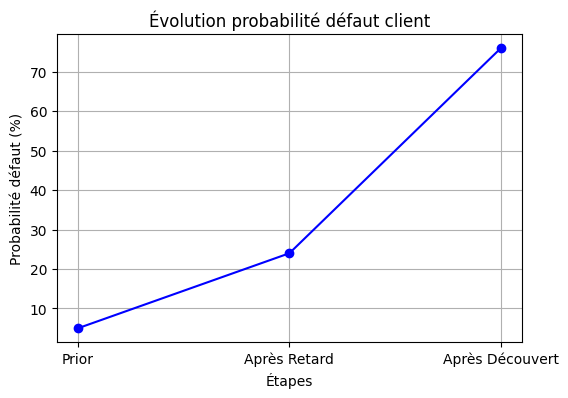

--- Après mise à jour séquentielle ---
P(Defaut | Retard ET Découvert) = 75.95%

--- Question 2.3 ---
Posterior après 2 événements : 91.37%

--- Question 2.4 ---
Precision modèle = 29.63%
Cette precision correspond à la probabilité P(Defaut|Retard) : cohérence avec Bayes
Explication : Precision = TP/(TP+FP) = fraction des prédictions positives qui sont correctes, exactement la définition bayésienne.



In [5]:
import matplotlib.pyplot as plt

# --- Question 2.1 : Calcul Bayes manuel ---
# Données
prior = 0.05                # P(Defaut) = 5%
P_retard_defaut = 0.6       # P(Retard | Defaut)
P_retard_no_defaut = 0.1    # P(Retard | Pas de Defaut)

# Théorème de Bayes
posterior = (P_retard_defaut * prior) / (P_retard_defaut * prior + P_retard_no_defaut * (1 - prior))
facteur_risque = posterior / prior

print("--- Question 2.1 ---")
print(f"P(Defaut | Retard) = {posterior*100:.2f}%")
print(f"Risque multiplié par : {facteur_risque:.2f}")
print("Décision recommandée : Surveillance renforcée ou restriction crédit.\n")

# --- Question 2.2 : Mise à jour séquentielle ---
# Nouveau signal : découvert >500€
P_decouvert_defaut = 0.5       # P(Decouvert | Defaut)
P_decouvert_no_defaut = 0.05   # P(Decouvert | Pas de Defaut)

posterior2 = (P_decouvert_defaut * posterior) / (P_decouvert_defaut * posterior + P_decouvert_no_defaut * (1 - posterior))

# Tracer évolution probabilité défaut
etapes = [0,1,2]
proba_defaut = [prior, posterior, posterior2]

plt.figure(figsize=(6,4))
plt.plot(etapes, [p*100 for p in proba_defaut], marker='o', linestyle='-', color='blue')
plt.xticks(etapes, ['Prior', 'Après Retard', 'Après Découvert'])
plt.ylabel("Probabilité défaut (%)")
plt.xlabel("Étapes")
plt.title("Évolution probabilité défaut client")
plt.grid(True)
plt.show()

print("--- Après mise à jour séquentielle ---")
print(f"P(Defaut | Retard ET Découvert) = {posterior2*100:.2f}%\n")

# --- Question 2.3 : Fonction générique Bayes ---
def bayes_update(prior, likelihood_pos, likelihood_neg):
    """
    Met à jour la probabilité a posteriori d'un événement positif avec le théorème de Bayes.

    Inputs :
        prior : float, probabilité a priori P(Positive)
        likelihood_pos : float, P(Evidence | Positive)
        likelihood_neg : float, P(Evidence | Negative)

    Output :
        posterior : float, P(Positive | Evidence)

    Exemple :
        bayes_update(0.15, 0.6, 0.1) => Posterior P(Positive|Evidence)
    """
    posterior = (likelihood_pos * prior) / (likelihood_pos * prior + likelihood_neg * (1 - prior))
    return posterior

# Test fonction avec 3 événements pour client segment Risque (prior 15%)
prior_risque = 0.15
posterior_risque1 = bayes_update(prior_risque, 0.6, 0.1)   # retard
posterior_risque2 = bayes_update(posterior_risque1, 0.5, 0.05)  # découvert
print("--- Question 2.3 ---")
print(f"Posterior après 2 événements : {posterior_risque2*100:.2f}%\n")

# --- Question 2.4 : Matrice confusion ---
TP = 400
FP = 950

precision = TP / (TP + FP)
print("--- Question 2.4 ---")
print(f"Precision modèle = {precision*100:.2f}%")
print("Cette precision correspond à la probabilité P(Defaut|Retard) : cohérence avec Bayes")
print("Explication : Precision = TP/(TP+FP) = fraction des prédictions positives qui sont correctes, exactement la définition bayésienne.\n")


5 premières lignes :
    age       salaire  anciennete_emploi  dette_totale  ratio_dette_revenu  \
0   63  45103.995164           5.410851  12501.672018            0.277174   
1   53  27449.913245           5.281147  16211.862596            0.590598   
2   39  41057.070752           1.445616      0.000000            0.000000   
3   32  38278.857963           5.255189  24702.084283            0.645319   
4   45  48394.819076           1.193406  20000.576705            0.413279   

   nb_credits_actifs  historique_retards  score_credit_bureau  defaut  
0                  3                   1           632.712692       0  
1                  1                   1           622.775748       0  
2                  5                   2           617.430942       0  
3                  1                   1           725.575805       0  
4                  1                   2           711.167106       0  

Statistiques descriptives :
                age        salaire  anciennete_emploi 

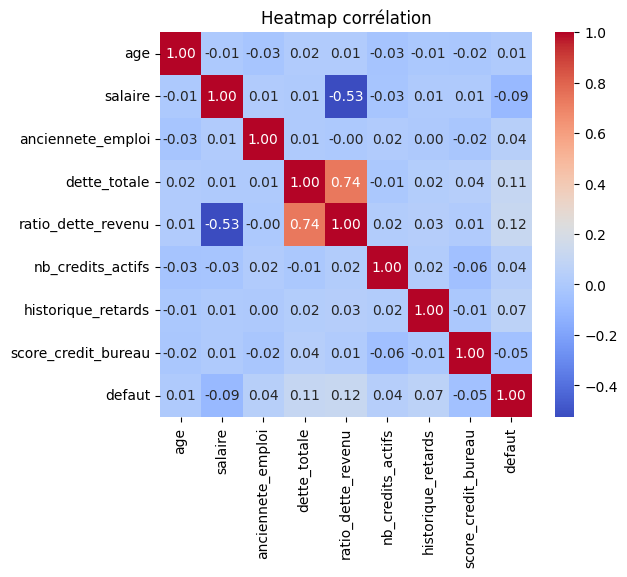

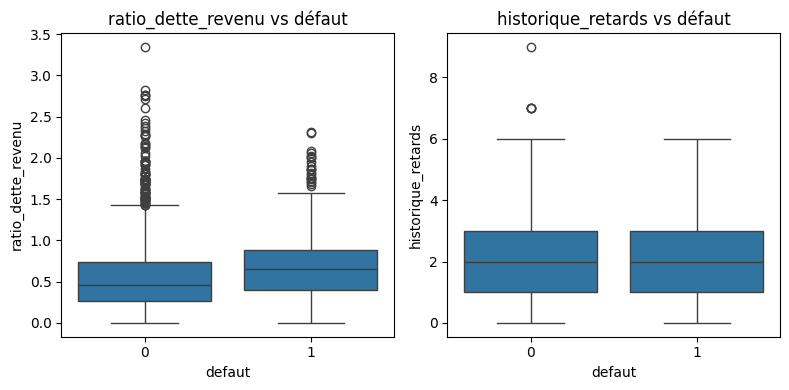

Train size: (1400, 8), Test size: (600, 8)
Distribution classes train:
 defaut
0    1166
1     234
Name: count, dtype: int64
Distribution classes test:
 defaut
0    500
1    100
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

    K  AUC_mean   AUC_std  Recall_mean  Precision_mean
0   1  0.523203  0.023048     0.196485        0.211673
1   3  0.526457  0.025732     0.077058        0.170404
2   5  0.522400  0.031469     0.029787        0.113305
3   7  0.529636  0.028693     0.017021        0.106667
4   9  0.536654  0.018208     0.008511        0.091667
5  11  0.550507  0.025671     0.008603        0.100000
6  15  0.571559  0.021967     0.008603        0.116667
7  20  0.586807  0.020308     0.000000        0.000000
8  25  0.612280  0.019525     0.000000        0.000000
9  30  0.609983  0.022396     0.000000        0.000000

K optimal = 25


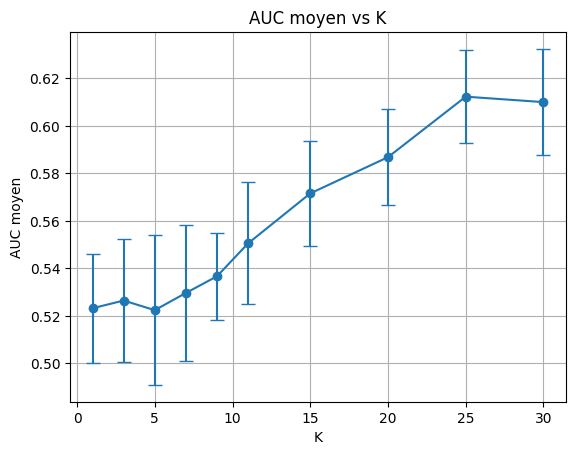

Matrice de confusion (TN, FP, FN, TP): 498 2 100 0

Métriques :
Accuracy: 0.83, Precision: 0.00, Recall: 0.00, F1: 0.00, AUC: 0.59, Specificity: 1.00

Classification report :
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       500
           1       0.00      0.00      0.00       100

    accuracy                           0.83       600
   macro avg       0.42      0.50      0.45       600
weighted avg       0.69      0.83      0.76       600



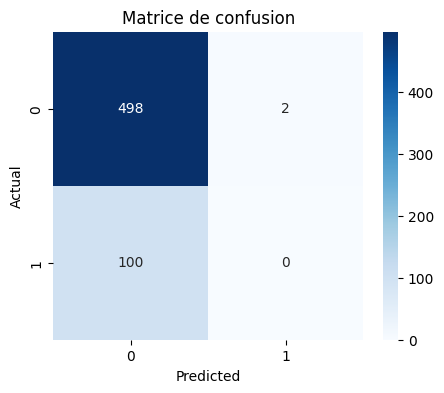

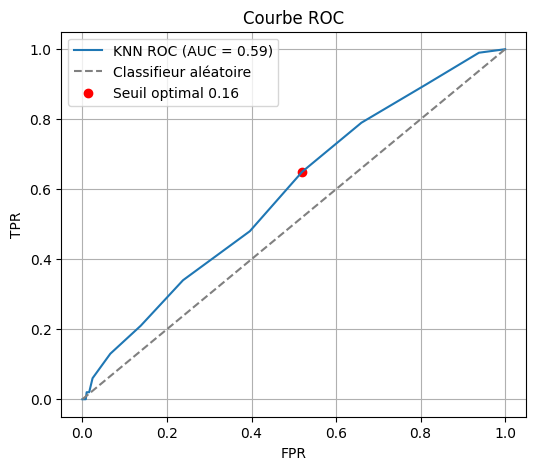

Seuil optimal Youden = 0.16

Seuil = 0.3
Precision: 0.28, Recall: 0.13, F1: 0.18

Seuil = 0.5
Precision: 0.00, Recall: 0.00, F1: 0.00

Seuil = 0.7
Precision: 0.00, Recall: 0.00, F1: 0.00
Seuil 0.3: ROI = -1166100 €
Seuil 0.5: ROI = -1503400 €
Seuil 0.7: ROI = -1500000 €

Recommandation : choisir seuil maximisant ROI tout en gardant Recall ≥ 0.8


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# --- Partie 3 : Analyse crédit KNN ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, precision_score, recall_score, f1_score, make_scorer, accuracy_score)

# --- Question 3.1 : Génération dataset ---
np.random.seed(42)
n_samples = 2000
age = np.random.randint(25, 66, n_samples)
salaire = np.random.normal(50000, 20000, n_samples).clip(20000, 120000)
anciennete_emploi = np.random.exponential(5, n_samples).clip(0,30)
dette_totale = np.random.normal(25000,15000,n_samples).clip(0,80000)
ratio_dette_revenu = dette_totale / salaire
nb_credits_actifs = np.random.poisson(1.5,n_samples).clip(0,5)
historique_retards = np.random.poisson(2,n_samples).clip(0,10)
score_credit = np.random.normal(650,100,n_samples).clip(300,850)

defaut_proba = (0.05 + 0.15*(ratio_dette_revenu>0.5) + 0.10*(historique_retards>3) +
                0.08*(score_credit<600) + 0.05*(nb_credits_actifs>2)).clip(0,0.85)
defaut = (np.random.rand(n_samples) < defaut_proba).astype(int)

df = pd.DataFrame({
    'age': age,
    'salaire': salaire,
    'anciennete_emploi': anciennete_emploi,
    'dette_totale': dette_totale,
    'ratio_dette_revenu': ratio_dette_revenu,
    'nb_credits_actifs': nb_credits_actifs,
    'historique_retards': historique_retards,
    'score_credit_bureau': score_credit,
    'defaut': defaut
})

print("5 premières lignes :\n", df.head())
print("\nStatistiques descriptives :\n", df.describe())
print(f"\nTaux défaut : {df['defaut'].mean()*100:.2f}%")
print("\nDistribution classes :\n", df['defaut'].value_counts())
print("\nCorrélation features vs target :\n", df.corr()['defaut'].sort_values())

# Visualisations
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap corrélation")
plt.show()

top_features = ['ratio_dette_revenu','historique_retards']
plt.figure(figsize=(8,4))
for i, feature in enumerate(top_features):
    plt.subplot(1,2,i+1)
    sns.boxplot(x='defaut', y=feature, data=df)
    plt.title(f"{feature} vs défaut")
plt.tight_layout()
plt.show()

# --- Question 3.2 : Preprocessing et split ---
X = df.drop('defaut', axis=1)
y = df['defaut']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print("Distribution classes train:\n", y_train.value_counts())
print("Distribution classes test:\n", y_test.value_counts())

# --- Question 3.3 : Recherche K optimal ---
K_list = [1,3,5,7,9,11,15,20,25,30]
results = []

for K in K_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    auc_scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf,
                                 scoring='roc_auc')
    recall_scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf,
                                    scoring='recall')
    precision_scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf,
                                       scoring='precision')

    results.append([K, auc_scores.mean(), auc_scores.std(),
                    recall_scores.mean(), precision_scores.mean()])

df_results = pd.DataFrame(results, columns=['K','AUC_mean','AUC_std','Recall_mean','Precision_mean'])
print(df_results)

K_optimal = df_results.loc[df_results['AUC_mean'].idxmax(),'K']
print(f"\nK optimal = {K_optimal}")

plt.errorbar(df_results['K'], df_results['AUC_mean'], yerr=df_results['AUC_std'],
             fmt='-o', capsize=5)
plt.xlabel("K")
plt.ylabel("AUC moyen")
plt.title("AUC moyen vs K")
plt.grid(True)
plt.show()

# --- Question 3.4 : Entraînement modèle final ---
knn_final = KNeighborsClassifier(n_neighbors=K_optimal)
knn_final.fit(X_train_scaled, y_train)

y_pred = knn_final.predict(X_test_scaled)
y_pred_proba = knn_final.predict_proba(X_test_scaled)[:,1]

# Matrice confusion
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("Matrice de confusion (TN, FP, FN, TP):", TN, FP, FN, TP)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
specificity = TN / (TN + FP)

print("\nMétriques :")
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}, AUC: {auc:.2f}, Specificity: {specificity:.2f}")
print("\nClassification report :\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice de confusion")
plt.show()

# --- Question 3.5 : Courbe ROC et analyse seuil ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"KNN ROC (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--', color='grey', label="Classifieur aléatoire")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Courbe ROC")
plt.legend()
plt.grid(True)

# Youden index
J = tpr - fpr
idx_opt = np.argmax(J)
seuil_optimal = thresholds[idx_opt]
plt.scatter(fpr[idx_opt], tpr[idx_opt], color='red', label=f"Seuil optimal {seuil_optimal:.2f}")
plt.legend()
plt.show()
print(f"Seuil optimal Youden = {seuil_optimal:.2f}")

# Tester 3 seuils
for s in [0.3,0.5,0.7]:
    y_thresh = (y_pred_proba >= s).astype(int)
    print(f"\nSeuil = {s}")
    print(f"Precision: {precision_score(y_test,y_thresh):.2f}, Recall: {recall_score(y_test,y_thresh):.2f}, F1: {f1_score(y_test,y_thresh):.2f}")

# --- Question 3.6 : ROI et recommandation business ---
def calcul_roi(TP, FP, FN):
    gains = TP * 15000
    couts_analyses = FP * (500 + 1200)
    pertes_FN = FN * 15000
    roi = gains - couts_analyses - pertes_FN
    return roi

for s in [0.3,0.5,0.7]:
    y_thresh = (y_pred_proba >= s).astype(int)
    cm_s = confusion_matrix(y_test, y_thresh)
    TN_s, FP_s, FN_s, TP_s = cm_s.ravel()
    roi = calcul_roi(TP_s, FP_s, FN_s)
    print(f"Seuil {s}: ROI = {roi:.0f} €")

print("\nRecommandation : choisir seuil maximisant ROI tout en gardant Recall ≥ 0.8")
